# Machine Learning Lab 1

## Assignment 3 (Deadline : 29/10/2020 11:59PM)

Total Points : 100

In [220]:
import numpy as np
np.random.seed(42)  # setting random seed for reproducibility

### 1. Digit Classification : 8 vs others (40 points)

In [221]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict


In [222]:
# The digits data can be loaded as follows :
from sklearn import datasets
D = datasets.load_digits()
X, y = D["data"], D["target"]
X.shape


(1797, 64)

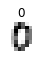

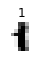

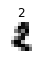

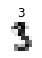

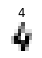

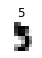

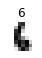

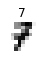

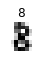

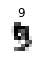

In [223]:
# Plot a few digits to get a sense of how the data looks like

for i in range(0,10):
    digit=X[i].reshape(8,8)
    plt.subplot(1,10,i+1)
    plt.imshow(digit,cmap=mpl.cm.binary)
    plt.axis("off")
    plt.title(y[i])
    plt.show()

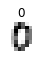

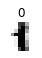

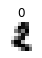

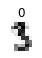

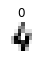

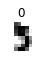

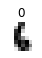

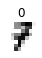

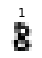

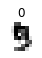

In [224]:
# Create a 2-class classification problem (digit 8 versus other digits)
# 20% for testing and rest for training
x_new=np.copy(X)
y_new=np.copy(y)


for i in range(len(y_new)):
    if y_new[i]==8:
        y_new[i]=1
    else :
        y_new[i]=0 

#splitting
# split=int(len(x_new)*.8)
# train_x=x_new[:split]
# train_y=y_new[:split]
# test_x=x_new[split:]
# test_y=y_new[split:]

train_x, test_x, train_y, test_y = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

#plotting
for i in range(0,10):
    digit=X[i].reshape(8,8)
    plt.subplot(1,10,i+1)
    plt.imshow(digit,cmap=mpl.cm.binary)
    plt.axis("off")
    plt.title(y_new[i])
    plt.show()


In [225]:
# Train a logistic regression model with no regularisation for the problem and obtain the cross validation accuracies

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='none',solver="saga",max_iter=10000,random_state=0)
clf.fit(train_x,train_y)
cross_score=cross_val_score(clf,test_x,test_y,cv=5,scoring="accuracy")
print(cross_score)

[0.95833333 0.98611111 0.93055556 0.98611111 0.97222222]


In [226]:
# Predict values for the test set using the model obtained above 
predicted_test_y=clf.predict(test_x)

for i in range(0,20):
    digit=test_x[i].reshape(8,8)
    plt.subplot(1,20,i+1)
    plt.imshow(digit,cmap=mpl.cm.binary)
    plt.axis("off")
    plt.title(predicted_test_y[i])
    plt.show()

cross validation accuracy =  0.9694444444444444
f1 score =  0.8135593220338982
precision score =  0.8275862068965517
confusion matrix =  [[325   5]
 [  6  24]]


Text(0.5, 0.98, 'Confusion Matrix')

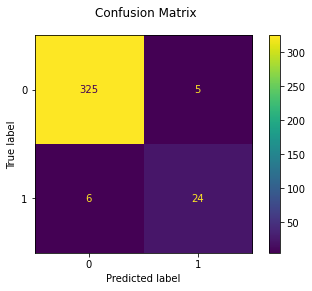

In [227]:
# Obtain all the different performance metrics for the model on the test set

from sklearn.model_selection import cross_val_score

accuracy=sklearn.metrics.accuracy_score(test_y,predicted_test_y)
print("cross validation accuracy = ",accuracy)

f1score=f1_score(test_y,predicted_test_y)
print("f1 score = ",f1score)

precisionscore =precision_score(test_y,predicted_test_y)
print("precision score = ",precisionscore)

conf_matrix=confusion_matrix(test_y,predicted_test_y)
print("confusion matrix = ",conf_matrix)

disp = sklearn.metrics.plot_confusion_matrix(clf, test_x, test_y)
disp.figure_.suptitle("Confusion Matrix")


best_parameters :  {'C': 0.01, 'penalty': 'l2'}
cross validation accuracy =  0.9666666666666667


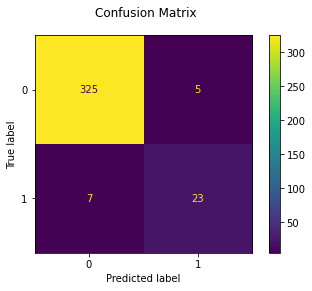

In [228]:
# Change the hyperparameters of the model and see what effect it has on the model
# Find the hyperparameters which maximises the model performance. Choose the right performance metric to evaluate the model
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# clf=GridSearchCV(LogisticRegression(random_state=42),{'alpha': [ 0.0001, 0.001, 0.1, 1, 10, 100,1000]},cv=10,return_train_score=True)

parameter= {'C': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,1000000,10000000], 'penalty': ['l1', 'l2', 'elasticnet']}
model = LogisticRegression()
classifier=GridSearchCV(model,parameter,cv=8,return_train_score=True)
classifier.fit(train_x,train_y)
best_predicted_test_y=classifier.predict(test_x)
print('best_parameters : ', classifier.best_params_)


disp = sklearn.metrics.plot_confusion_matrix(classifier, test_x, test_y)
disp.figure_.suptitle("Confusion Matrix")
accuracy=sklearn.metrics.accuracy_score(test_y,best_predicted_test_y)
print("cross validation accuracy = ",accuracy)




### 2. California Housing Prices (60 points)

In this problem, we will take the same California Housing prices dataset that was shown in the last lab class to do a binary classification of whether the median house value for a given locality is high or low .

In [230]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [231]:
# Read the data into a dataframe
import pandas as pd
df=pd.read_csv("datasets/housing/housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [232]:
# Explore the data to understand it better
df.describe()





,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


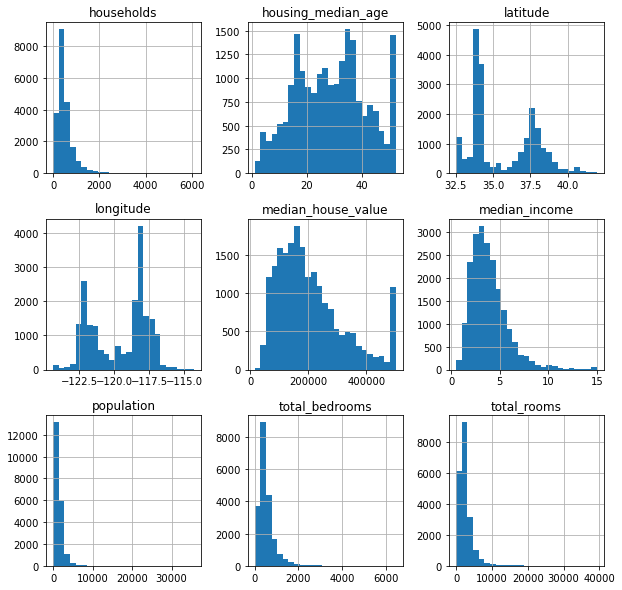

In [233]:
df.hist(bins=25,figsize=(10,10))
plt.show()

In [234]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [235]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [236]:
df.dropna(subset=["total_bedrooms"]) #this has missing values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [240]:
# Convert the data to suit a binary classification of High Price vs Low Price for the median_house_value column
# Assume that anything >= $200,000 is high price with output value 1 and anything less than that is low price with output value 0.

df['median_house_modified'] = np.where(df['median_house_value']>= 200000, 1, 0)

df



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_house_modified
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,3,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,3,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1,0


In [241]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df.ocean_proximity.unique()

array([3, 0, 1, 4, 2], dtype=int64)

In [250]:
# Use stratified sampling to create an 80-20 train-test split

X, y = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']], df['median_house_modified']
#without stratifying
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

print((train_x.shape[0], test_x.shape[0]))


from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
train_x = independent_scaler.fit_transform(train_x)
test_x = independent_scaler.transform(test_x)



(16512, 4128)


In [251]:
# Find the best Logistic Regression model that can solve this problem
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

parameter= {'C': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,1000000,10000000], 'penalty': ['l1', 'l2', 'elasticnet']}
model = LogisticRegression()
classifier=GridSearchCV(model,parameter,cv=8,return_train_score=True)
classifier.fit(train_x,train_y)

print('best parameters : ', classifier.best_params_)

new_model = LogisticRegression(penalty=classifier.best_params_['penalty'], C=classifier.best_params_['C'], max_iter=15000)
new_model.fit(train_x, train_y)

best_predicted_test_y = best_model.predict(test_x)

disp = sklearn.metrics.plot_confusion_matrix(new_model, test_x, test_y)
disp.figure_.suptitle("Confusion Matrix")
accuracy=sklearn.metrics.accuracy_score(test_y,best_predicted_test_y)
print("cross validation accuracy = ",accuracy)


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.